In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
import numpy as np


In [2]:
team_colours = {"BULLS": '#AED6F1', 
                 "LIONS": '#F5180D',  
                 "STORMERS": '#2932E8',
                 "SHARKS": '#050100', 
                 "LEINSTER": '#2932E8', 
                 "MUNSTER": '#F5180D', 
                 "ULSTER": '#F9ECEB', 
                 "CONNACHT": '#2A6F24',
                 
                 "EDINBURGH": '#221E81', 
                 "GLASGOW": '#14123D', 
                 
                 "CARDIFF": '#AED6F1', 
                 "SCARLETS": '#F91830',
                 "OSPREYS": '#050100', 
                 "DRAGONS": '#F7DC6F',
                 "ZEBRE": '#2932E8',
                 "BENETTON": '#43D662'
                }

In [3]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Library/CloudStorage/OneDrive-Personal/github-projects/rugby/rugby'

In [4]:
raw_df = pd.read_csv("0_data/match_data/urc_matches.csv")
raw_df

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2021-09-24,ZEBRE,LIONS,4.0,51_61_64_57,5.0,32_19_21_15_10,0.0,NaN,1.0,...,ZEBRE_LIONS_2021-09-24,26,38,-12,924,919,26,26,27,25
1,2021-09-24,CARDIFF,CONNACHT,5.0,38_50_69_9_73,2.0,12_80,0.0,NaN,3.0,...,CARDIFF_CONNACHT_2021-09-24,33,21,12,929,892,28,27,26,26
2,2021-09-24,ULSTER,GLASGOW,5.0,22_43_48_58_3,4.0,42_14_64_54,0.0,NaN,1.0,...,ULSTER_GLASGOW_2021-09-24,35,29,6,906,912,29,26,28,26
3,2021-09-25,MUNSTER,SHARKS,6.0,43_50_35_5_78_76,2.0,56_69,2.0,28_68,1.0,...,MUNSTER_SHARKS_2021-09-25,42,17,25,907,946,28,25,26,24
4,2021-09-25,BENETTON,STORMERS,3.0,15_58_70,2.0,1_43,1.0,62,2.0,...,BENETTON_STORMERS_2021-09-25,22,18,4,909,903,24,26,27,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LEINSTER_GLASGOW_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BULLS_DRAGONS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LIONS_OSPREYS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZEBRE_CONNACHT_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1


In [5]:
raw_df.dtypes

match_date_                     object
Home team                       object
Away team                       object
home_n_tries                   float64
minutes_of_home_tries           object
away_n_tries                   float64
minutes_of_away_tries           object
home_n_pen_kicks               float64
minutes_of_home_pen_kicks       object
away_n_pen_kicks               float64
minutes_of_away_pen_kicks       object
home_n_conversions             float64
minutes_of_home_conversions     object
away_n_conversions             float64
minutes_of_away_conversions     object
competition                     object
pen_try_minutes_home            object
pen_try_minutes_away            object
round_stage                     object
pkey                            object
home_score                       int64
away_score                       int64
score_diff                       int64
home_pack_weight                 int64
away_pack_weight                 int64
home_forwards_ages       

In [6]:
matches = raw_df[['match_date_', 'pkey', 'round_stage', 'Home team', 'Away team', 
        'minutes_of_home_tries', 'minutes_of_home_pen_kicks', 'minutes_of_home_conversions', 'pen_try_minutes_home',
        'minutes_of_away_tries', 'minutes_of_away_pen_kicks', 'minutes_of_away_conversions', 'pen_try_minutes_away',
       'home_score', 'away_score', 'home_n_tries', 'away_n_tries']]

matches.sort_values(by='match_date_')

,match_date_,pkey,round_stage,Home team,Away team,minutes_of_home_tries,minutes_of_home_pen_kicks,minutes_of_home_conversions,pen_try_minutes_home,minutes_of_away_tries,minutes_of_away_pen_kicks,minutes_of_away_conversions,pen_try_minutes_away,home_score,away_score,home_n_tries,away_n_tries
0,2021-09-24,ZEBRE_LIONS_2021-09-24,pool stage,ZEBRE,LIONS,51_61_64_57,NaN,51_62,57',32_19_21_15_10,42,11_16_19_22_33,NaN,26,38,4.0,5.0
1,2021-09-24,CARDIFF_CONNACHT_2021-09-24,pool stage,CARDIFF,CONNACHT,38_50_69_9_73,NaN,40_51_70_10,NaN,12_80,3_36_57,13,NaN,33,21,5.0,2.0
2,2021-09-24,ULSTER_GLASGOW_2021-09-24,pool stage,ULSTER,GLASGOW,22_43_48_58_3,NaN,23_44_49_60,3',42_14_64_54,26,44_65,54',35,29,5.0,4.0
3,2021-09-25,MUNSTER_SHARKS_2021-09-25,pool stage,MUNSTER,SHARKS,43_50_35_5_78_76,28_68,44_51_78,NaN,56_69,31,56_70,NaN,42,17,6.0,2.0
4,2021-09-25,BENETTON_STORMERS_2021-09-25,pool stage,BENETTON,STORMERS,15_58_70,62,16_59,NaN,1_43,22_37,44,NaN,22,18,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2025-05-17,LIONS_OSPREYS_2025-05-17,pool stage,LIONS,OSPREYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
595,2025-05-17,ZEBRE_CONNACHT_2025-05-17,pool stage,ZEBRE,CONNACHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
592,2025-05-17,LEINSTER_GLASGOW_2025-05-17,pool stage,LEINSTER,GLASGOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN
593,2025-05-17,BULLS_DRAGONS_2025-05-17,pool stage,BULLS,DRAGONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN


In [7]:
# create a season column
mask_24_25 = (matches['match_date_'] > '2024-07-31') & (matches['match_date_'] <= '2025-07-11')
mask_23_24 = (matches['match_date_'] > '2023-07-31') & (matches['match_date_'] <= '2024-07-11')
mask_22_23 = (matches['match_date_'] > '2022-07-31') & (matches['match_date_'] <= '2023-07-11')
mask_21_22 = (matches['match_date_'] > '2021-07-31') & (matches['match_date_'] <= '2022-07-11')

matches.loc[mask_24_25, "Season"] = "24/25 (6 rounds)"
matches.loc[mask_23_24, "Season"] = "23/24"
matches.loc[mask_22_23, "Season"] = "22/23"
matches.loc[mask_21_22, "Season"] = "21/22"

matches

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_31473/2178747373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.loc[mask_24_25, "Season"] = "24/25 (6 rounds)"


,match_date_,pkey,round_stage,Home team,Away team,minutes_of_home_tries,minutes_of_home_pen_kicks,minutes_of_home_conversions,pen_try_minutes_home,minutes_of_away_tries,minutes_of_away_pen_kicks,minutes_of_away_conversions,pen_try_minutes_away,home_score,away_score,home_n_tries,away_n_tries,Season
0,2021-09-24,ZEBRE_LIONS_2021-09-24,pool stage,ZEBRE,LIONS,51_61_64_57,NaN,51_62,57',32_19_21_15_10,42,11_16_19_22_33,NaN,26,38,4.0,5.0,21/22
1,2021-09-24,CARDIFF_CONNACHT_2021-09-24,pool stage,CARDIFF,CONNACHT,38_50_69_9_73,NaN,40_51_70_10,NaN,12_80,3_36_57,13,NaN,33,21,5.0,2.0,21/22
2,2021-09-24,ULSTER_GLASGOW_2021-09-24,pool stage,ULSTER,GLASGOW,22_43_48_58_3,NaN,23_44_49_60,3',42_14_64_54,26,44_65,54',35,29,5.0,4.0,21/22
3,2021-09-25,MUNSTER_SHARKS_2021-09-25,pool stage,MUNSTER,SHARKS,43_50_35_5_78_76,28_68,44_51_78,NaN,56_69,31,56_70,NaN,42,17,6.0,2.0,21/22
4,2021-09-25,BENETTON_STORMERS_2021-09-25,pool stage,BENETTON,STORMERS,15_58_70,62,16_59,NaN,1_43,22_37,44,NaN,22,18,3.0,2.0,21/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER_GLASGOW_2025-05-17,pool stage,LEINSTER,GLASGOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,24/25 (6 rounds)
593,2025-05-17,BULLS_DRAGONS_2025-05-17,pool stage,BULLS,DRAGONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,24/25 (6 rounds)
594,2025-05-17,LIONS_OSPREYS_2025-05-17,pool stage,LIONS,OSPREYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,24/25 (6 rounds)
595,2025-05-17,ZEBRE_CONNACHT_2025-05-17,pool stage,ZEBRE,CONNACHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,24/25 (6 rounds)


In [8]:
common_features = ['pkey', 'match_date_',
                   'Home team', 'Away team', 'Season', 'home_score', 'away_score',
                   'home_n_tries', 'away_n_tries',
                   'minutes_of_home_tries', 'minutes_of_away_tries',
                  'pen_try_minutes_home', 'pen_try_minutes_away',
                  'minutes_of_home_pen_kicks', 'minutes_of_home_conversions',
                  'minutes_of_away_pen_kicks',	'minutes_of_away_conversions']

# home data
temp1 = matches[common_features].copy()
temp1['Team Location'] = "Home Team"
temp1.rename(columns={"Home team": "Team",
                    "Away team": "Opponents",
                    "home_score": "Team Score",
                    "away_score": "Opponent Score",
                    "home_n_tries": "Tries Scored",
                     "away_n_tries": "Tries Conceded",
                     "minutes_of_home_tries": "Tries Scored Minutes",
                     "minutes_of_away_tries": "Tries Conceded Minutes",
                     "pen_try_minutes_home": "Pen Tries Scored",
                     "pen_try_minutes_away": "Pen Tries Conceded",
                     "minutes_of_home_pen_kicks": "Pen Kicks Scored",
                     "minutes_of_away_pen_kicks": "Pen Kicks Conceded",
                     "minutes_of_home_conversions": "Conversions Scored",
                     "minutes_of_away_conversions": "Conversions Conceded"

                     },
                    inplace=True)

# away data
temp2 = matches[common_features].copy()
temp2['Team Location'] = "Away Team"
temp2.rename(columns={"Away team": "Team",
                    "Home team": "Opponents",
                    "away_score": "Team Score",
                    "home_score": "Opponent Score",
                    "away_n_tries": "Tries Scored",
                     "home_n_tries": "Tries Conceded",
                      "minutes_of_away_tries": "Tries Scored Minutes",
                     "minutes_of_home_tries": "Tries Conceded Minutes",
                     "pen_try_minutes_away": "Pen Tries Scored",
                     "pen_try_minutes_home": "Pen Tries Conceded",
                     "minutes_of_away_pen_kicks": "Pen Kicks Scored",
                     "minutes_of_home_pen_kicks": "Pen Kicks Conceded",
                     "minutes_of_away_conversions": "Conversions Scored",
                     "minutes_of_home_conversions": "Conversions Conceded",
                     },
                    inplace=True)



# concat dfs together
team_per_row_df = pd.concat([temp1, temp2])
team_per_row_df.reset_index(inplace=True, drop=True)


team_per_row_df.rename(columns={"match_date_": "Match Date",
                    "pkey": "Primary Key"},
                    inplace=True)

team_per_row_df['Match Date'] = pd.to_datetime(team_per_row_df['Match Date'])

del(temp1)
del(temp2)

team_per_row_df.tail(5)

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,Tries Conceded Minutes,Pen Tries Scored,Pen Tries Conceded,Pen Kicks Scored,Conversions Scored,Pen Kicks Conceded,Conversions Conceded,Team Location
1189,LEINSTER_GLASGOW_2025-05-17,2025-05-17,GLASGOW,LEINSTER,24/25 (6 rounds),-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away Team
1190,BULLS_DRAGONS_2025-05-17,2025-05-17,DRAGONS,BULLS,24/25 (6 rounds),-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away Team
1191,LIONS_OSPREYS_2025-05-17,2025-05-17,OSPREYS,LIONS,24/25 (6 rounds),-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away Team
1192,ZEBRE_CONNACHT_2025-05-17,2025-05-17,CONNACHT,ZEBRE,24/25 (6 rounds),-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away Team
1193,SHARKS_SCARLETS_2025-05-17,2025-05-17,SCARLETS,SHARKS,24/25 (6 rounds),-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away Team


In [9]:
# filter out any future fixtures, only keep historical results
day_filter = "2024-10-28"

df = team_per_row_df.loc[team_per_row_df['Match Date'] < day_filter].copy()

df = df.sort_values(by=['Match Date', 'Team Location'], ascending=[True, False])

df = df.reset_index(drop=True)

df['Tries Scored Minutes'] = df['Tries Scored Minutes'].fillna('NA')
df['Tries Conceded Minutes'] = df['Tries Conceded Minutes'].fillna('NA')

df['Pen Tries Scored'] = df['Pen Tries Scored'].fillna('NA')
df['Pen Tries Conceded'] = df['Pen Tries Conceded'].fillna('NA')

df['Pen Kicks Scored'] = df['Pen Kicks Scored'].fillna('NA')
df['Pen Kicks Conceded'] = df['Pen Kicks Conceded'].fillna('NA')

df['Conversions Scored'] = df['Conversions Scored'].fillna('NA')
df['Conversions Conceded'] = df['Conversions Conceded'].fillna('NA')

df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,Tries Conceded Minutes,Pen Tries Scored,Pen Tries Conceded,Pen Kicks Scored,Conversions Scored,Pen Kicks Conceded,Conversions Conceded,Team Location
982,SCARLETS_ZEBRE_2024-10-25,2024-10-25,SCARLETS,ZEBRE,24/25 (6 rounds),30,8,4.0,1.0,56_46_42_27,8,NA,NA,4_23,43_58,NA,NA,Home Team
983,BENETTON_BULLS_2024-10-25,2024-10-25,BENETTON,BULLS,24/25 (6 rounds),15,17,0.0,2.0,NA,67_77,NA,NA,1_34_62_72_3,NA,22,68_79,Home Team
984,SCARLETS_ZEBRE_2024-10-25,2024-10-25,ZEBRE,SCARLETS,24/25 (6 rounds),8,30,1.0,4.0,8,56_46_42_27,NA,NA,NA,NA,4_23,43_58,Away Team
985,BENETTON_BULLS_2024-10-25,2024-10-25,BULLS,BENETTON,24/25 (6 rounds),17,15,2.0,0.0,67_77,NA,NA,NA,22,68_79,1_34_62_72_3,NA,Away Team
986,STORMERS_GLASGOW_2024-10-26,2024-10-26,STORMERS,GLASGOW,24/25 (6 rounds),17,28,2.0,4.0,33_54,37_63_47_70,NA,NA,63,34_55,NA,38_48_65_72,Home Team
987,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,OSPREYS,EDINBURGH,24/25 (6 rounds),22,13,3.0,1.0,51_3_74,22,NA,NA,60,5_75,16_65,22,Home Team
988,SHARKS_MUNSTER_2024-10-26,2024-10-26,SHARKS,MUNSTER,24/25 (6 rounds),41,24,5.0,4.0,65_23_4_36_0,80_18_73_30,NA,NA,13_48,1_5_24_37_66,NA,73_81,Home Team
989,LEINSTER_LIONS_2024-10-26,2024-10-26,LEINSTER,LIONS,24/25 (6 rounds),24,6,3.0,0.0,31_58_81,NA,81',NA,2,32_59,12_17,NA,Home Team
990,CONNACHT_DRAGONS_2024-10-26,2024-10-26,CONNACHT,DRAGONS,24/25 (6 rounds),31,7,5.0,1.0,38_5_18_73_80,77,NA,NA,NA,6_20_74,NA,77,Home Team
991,CARDIFF_ULSTER_2024-10-26,2024-10-26,CARDIFF,ULSTER,24/25 (6 rounds),21,19,3.0,3.0,48_63_67,13_17_23,NA,NA,NA,49_64_68,NA,14_18,Home Team


In [10]:

def parse_tries_scored(tries_scored_mins, pen_tries_minutes, half, to_return):
    if tries_scored_mins!='NA':
        tries_list = [int(i) for i in tries_scored_mins.split('_')]
    else:
        tries_list=[]

    pen_tries_list = pen_tries_minutes.split("\'")
    pen_tries_list = [i for i in pen_tries_list if len(i)>0]
    pen_tries_list = [int(i) for i in pen_tries_list if i!='NA']

    for p in pen_tries_list:
        if p in tries_list:
            tries_list.remove(p)

    if to_return == 'tries': # return tries number
        if half=='first':
            tries_list = [1 if i <= 40 else 0 for i in tries_list]
        elif half=='second':
            tries_list = [1 if i > 40 else 0 for i in tries_list]
        return sum(tries_list)

    if to_return == 'pen_tries':
        if half=='first':
            pen_tries_list = [1 if i <= 40 else 0 for i in pen_tries_list]
        elif half=='second':
            pen_tries_list = [1 if i > 40 else 0 for i in pen_tries_list]
        return sum(pen_tries_list)
            

In [11]:
df['1st_half_tries_scored'] = df.apply(lambda row: parse_tries_scored(row['Tries Scored Minutes'], row['Pen Tries Scored'], 'first', 'tries'), axis=1)
df['1st_half_pen_tries_scored'] = df.apply(lambda row: parse_tries_scored(row['Tries Scored Minutes'], row['Pen Tries Scored'], 'first', 'pen_tries'), axis=1)

df['2nd_half_tries_scored'] = df.apply(lambda row: parse_tries_scored(row['Tries Scored Minutes'], row['Pen Tries Scored'], 'second', 'tries'), axis=1)
df['2nd_half_pen_tries_scored'] = df.apply(lambda row: parse_tries_scored(row['Tries Scored Minutes'], row['Pen Tries Scored'], 'second', 'pen_tries'), axis=1)

df['1st_half_tries_conceded'] = df.apply(lambda row: parse_tries_scored(row['Tries Conceded Minutes'], row['Pen Tries Conceded'], 'first', 'tries'), axis=1)
df['1st_half_pen_tries_conceded'] = df.apply(lambda row: parse_tries_scored(row['Tries Conceded Minutes'], row['Pen Tries Conceded'], 'first', 'pen_tries'), axis=1)

df['2nd_half_tries_conceded'] = df.apply(lambda row: parse_tries_scored(row['Tries Conceded Minutes'], row['Pen Tries Conceded'], 'second', 'tries'), axis=1)
df['2nd_half_pen_tries_conceded'] = df.apply(lambda row: parse_tries_scored(row['Tries Conceded Minutes'], row['Pen Tries Conceded'], 'second', 'pen_tries'), axis=1)

df

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,...,Conversions Conceded,Team Location,1st_half_tries_scored,1st_half_pen_tries_scored,2nd_half_tries_scored,2nd_half_pen_tries_scored,1st_half_tries_conceded,1st_half_pen_tries_conceded,2nd_half_tries_conceded,2nd_half_pen_tries_conceded
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,26,38,4.0,5.0,51_61_64_57,...,11_16_19_22_33,Home Team,0,0,3,1,5,0,0,0
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,21/22,33,21,5.0,2.0,38_50_69_9_73,...,13,Home Team,2,0,3,0,1,0,1,0
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,35,29,5.0,4.0,22_43_48_58_3,...,44_65,Home Team,1,1,3,0,1,0,2,1
3,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,21/22,38,26,5.0,4.0,32_19_21_15_10,...,51_62,Away Team,5,0,0,0,0,0,3,1
4,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,21/22,21,33,2.0,5.0,12_80,...,40_51_70_10,Away Team,1,0,1,0,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,EDINBURGH,OSPREYS,24/25 (6 rounds),13,22,1.0,3.0,22,...,5_75,Away Team,1,0,0,0,1,0,2,0
994,SHARKS_MUNSTER_2024-10-26,2024-10-26,MUNSTER,SHARKS,24/25 (6 rounds),24,41,4.0,5.0,80_18_73_30,...,1_5_24_37_66,Away Team,2,0,2,0,4,0,1,0
995,LEINSTER_LIONS_2024-10-26,2024-10-26,LIONS,LEINSTER,24/25 (6 rounds),6,24,0.0,3.0,NA,...,32_59,Away Team,0,0,0,0,1,0,1,1
996,CONNACHT_DRAGONS_2024-10-26,2024-10-26,DRAGONS,CONNACHT,24/25 (6 rounds),7,31,1.0,5.0,77,...,6_20_74,Away Team,0,0,1,0,3,0,2,0


In [12]:
def parse_kicks_scored(kick_mins, half):
    if kick_mins!='NA':
        kick_mins = [int(i) for i in kick_mins.split('_')]
    else:
        kick_mins=[]

    if half=='first':
        kick_list = [1 if i <= 40 else 0 for i in kick_mins]
    elif half=='second':
        kick_list = [1 if i > 40 else 0 for i in kick_mins]
    return sum(kick_list)

            

In [13]:
kick_mins='40_51_70_10'
parse_kicks_scored(kick_mins, 'second')

2

In [14]:
df['1st_half_pens_scored'] = df.apply(lambda row: parse_kicks_scored(row['Pen Kicks Scored'], 'first'), axis=1)
df['2nd_half_pens_scored'] = df.apply(lambda row: parse_kicks_scored(row['Pen Kicks Scored'], 'second'), axis=1)

df['1st_half_conversions_scored'] = df.apply(lambda row: parse_kicks_scored(row['Conversions Scored'], 'first'), axis=1)
df['2nd_half_conversions_scored'] = df.apply(lambda row: parse_kicks_scored(row['Conversions Scored'], 'second'), axis=1)

df['1st_half_pens_conceded'] = df.apply(lambda row: parse_kicks_scored(row['Pen Kicks Conceded'], 'first'), axis=1)
df['2nd_half_pens_conceded'] = df.apply(lambda row: parse_kicks_scored(row['Pen Kicks Conceded'], 'second'), axis=1)

df['1st_half_conversions_conceded'] = df.apply(lambda row: parse_kicks_scored(row['Conversions Conceded'], 'first'), axis=1)
df['2nd_half_conversions_conceded'] = df.apply(lambda row: parse_kicks_scored(row['Conversions Conceded'], 'second'), axis=1)


df

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,...,2nd_half_tries_conceded,2nd_half_pen_tries_conceded,1st_half_pens_scored,2nd_half_pens_scored,1st_half_conversions_scored,2nd_half_conversions_scored,1st_half_pens_conceded,2nd_half_pens_conceded,1st_half_conversions_conceded,2nd_half_conversions_conceded
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,26,38,4.0,5.0,51_61_64_57,...,0,0,0,0,0,2,0,1,5,0
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,21/22,33,21,5.0,2.0,38_50_69_9_73,...,1,0,0,0,2,2,2,1,1,0
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,35,29,5.0,4.0,22_43_48_58_3,...,2,1,0,0,1,3,1,0,0,2
3,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,21/22,38,26,5.0,4.0,32_19_21_15_10,...,3,1,0,1,5,0,0,0,0,2
4,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,21/22,21,33,2.0,5.0,12_80,...,3,0,2,1,1,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,EDINBURGH,OSPREYS,24/25 (6 rounds),13,22,1.0,3.0,22,...,2,0,1,1,1,0,0,1,1,1
994,SHARKS_MUNSTER_2024-10-26,2024-10-26,MUNSTER,SHARKS,24/25 (6 rounds),24,41,4.0,5.0,80_18_73_30,...,1,0,0,0,0,2,1,1,4,1
995,LEINSTER_LIONS_2024-10-26,2024-10-26,LIONS,LEINSTER,24/25 (6 rounds),6,24,0.0,3.0,NA,...,1,1,2,0,0,0,1,0,1,1
996,CONNACHT_DRAGONS_2024-10-26,2024-10-26,DRAGONS,CONNACHT,24/25 (6 rounds),7,31,1.0,5.0,77,...,2,0,0,0,0,1,0,0,2,1


In [15]:
df.dtypes

Primary Key                              object
Match Date                       datetime64[ns]
Team                                     object
Opponents                                object
Season                                   object
Team Score                                int64
Opponent Score                            int64
Tries Scored                            float64
Tries Conceded                          float64
Tries Scored Minutes                     object
Tries Conceded Minutes                   object
Pen Tries Scored                         object
Pen Tries Conceded                       object
Pen Kicks Scored                         object
Conversions Scored                       object
Pen Kicks Conceded                       object
Conversions Conceded                     object
Team Location                            object
1st_half_tries_scored                     int64
1st_half_pen_tries_scored                 int64
2nd_half_tries_scored                   

In [16]:
df['1st_half_team_score'] = (df['1st_half_tries_scored']*5) + (df['1st_half_conversions_scored']*2) + (df['1st_half_pen_tries_scored']*7) + (df['1st_half_pens_scored']*3)
df['2nd_half_team_score'] = (df['2nd_half_tries_scored']*5) + (df['2nd_half_conversions_scored']*2) + (df['2nd_half_pen_tries_scored']*7) + (df['2nd_half_pens_scored']*3)

df['1st_half_opponent_score'] = (df['1st_half_tries_conceded']*5) + (df['1st_half_conversions_conceded']*2) + (df['1st_half_pen_tries_conceded']*7) + (df['1st_half_pens_conceded']*3)
df['2nd_half_opponent_score'] = (df['2nd_half_tries_conceded']*5) + (df['2nd_half_conversions_conceded']*2) + (df['2nd_half_pen_tries_conceded']*7) + (df['2nd_half_pens_conceded']*3)


df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,...,1st_half_conversions_scored,2nd_half_conversions_scored,1st_half_pens_conceded,2nd_half_pens_conceded,1st_half_conversions_conceded,2nd_half_conversions_conceded,1st_half_team_score,2nd_half_team_score,1st_half_opponent_score,2nd_half_opponent_score
982,SCARLETS_ZEBRE_2024-10-25,2024-10-25,SCARLETS,ZEBRE,24/25 (6 rounds),30,8,4.0,1.0,56_46_42_27,...,0,2,0,0,0,0,11,19,5,0
983,BENETTON_BULLS_2024-10-25,2024-10-25,BENETTON,BULLS,24/25 (6 rounds),15,17,0.0,2.0,NA,...,0,0,1,0,0,2,9,6,3,14
984,SCARLETS_ZEBRE_2024-10-25,2024-10-25,ZEBRE,SCARLETS,24/25 (6 rounds),8,30,1.0,4.0,8,...,0,0,2,0,0,2,5,0,11,19
985,BENETTON_BULLS_2024-10-25,2024-10-25,BULLS,BENETTON,24/25 (6 rounds),17,15,2.0,0.0,67_77,...,0,2,3,2,0,0,3,14,9,6
986,STORMERS_GLASGOW_2024-10-26,2024-10-26,STORMERS,GLASGOW,24/25 (6 rounds),17,28,2.0,4.0,33_54,...,1,1,0,0,1,3,7,10,7,21
987,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,OSPREYS,EDINBURGH,24/25 (6 rounds),22,13,3.0,1.0,51_3_74,...,1,1,1,1,1,0,7,15,10,3
988,SHARKS_MUNSTER_2024-10-26,2024-10-26,SHARKS,MUNSTER,24/25 (6 rounds),41,24,5.0,4.0,65_23_4_36_0,...,4,1,0,0,0,2,31,10,10,14
989,LEINSTER_LIONS_2024-10-26,2024-10-26,LEINSTER,LIONS,24/25 (6 rounds),24,6,3.0,0.0,31_58_81,...,1,1,2,0,0,0,10,14,6,0
990,CONNACHT_DRAGONS_2024-10-26,2024-10-26,CONNACHT,DRAGONS,24/25 (6 rounds),31,7,5.0,1.0,38_5_18_73_80,...,2,1,0,0,0,1,19,12,0,7
991,CARDIFF_ULSTER_2024-10-26,2024-10-26,CARDIFF,ULSTER,24/25 (6 rounds),21,19,3.0,3.0,48_63_67,...,0,3,0,0,2,0,0,21,19,0


In [17]:
def points_for_win(team_points, opp_points):
    if team_points > opp_points:
        return 4
    else:
        return 0

def points_for_draw(team_points, opp_points):
    if team_points == opp_points:
        return 2
    else:
        return 0

def points_for_losing_bonus(team_points, opp_points, points_for_win):
    output = 0
    if points_for_win == 0: # only losing team can get losing bonus point
        if (opp_points - team_points) <= 7:
            output = 1
    return output

def points_for_try_bonus(team_tries_scored):
    if team_tries_scored >= 4:
        return 1
    else:
        return 0

# for counts of wins etc
def binary_for_win(team_points, opp_points):
    if team_points > opp_points:
        return 1
    else:
        return 0

def binary_for_draw(team_points, opp_points):
    if team_points == opp_points:
        return 1
    else:
        return 0

# Full time table

In [18]:
df['points_for_win'] = df.apply(lambda row: points_for_win(row['Team Score'], row['Opponent Score']), axis=1)
df['points_for_draw'] = df.apply(lambda row: points_for_draw(row['Team Score'], row['Opponent Score']), axis=1)
df['Losing Bonus'] = df.apply(lambda row: points_for_losing_bonus(row['Team Score'], row['Opponent Score'], row['points_for_win']), axis=1)
df['Try Bonus'] = df.apply(lambda row: points_for_try_bonus(row['Tries Scored']), axis=1)
df['Points'] = df['points_for_win'] + df['points_for_draw'] + df['Losing Bonus'] + df['Try Bonus']


df['W'] = df.apply(lambda row: binary_for_win(row['Team Score'], row['Opponent Score']), axis=1)
df['D'] = df.apply(lambda row: binary_for_draw(row['Team Score'], row['Opponent Score']), axis=1)
df['P'] = 1


df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,...,1st_half_opponent_score,2nd_half_opponent_score,points_for_win,points_for_draw,Losing Bonus,Try Bonus,Points,W,D,P
982,SCARLETS_ZEBRE_2024-10-25,2024-10-25,SCARLETS,ZEBRE,24/25 (6 rounds),30,8,4.0,1.0,56_46_42_27,...,5,0,4,0,0,1,5,1,0,1
983,BENETTON_BULLS_2024-10-25,2024-10-25,BENETTON,BULLS,24/25 (6 rounds),15,17,0.0,2.0,NA,...,3,14,0,0,1,0,1,0,0,1
984,SCARLETS_ZEBRE_2024-10-25,2024-10-25,ZEBRE,SCARLETS,24/25 (6 rounds),8,30,1.0,4.0,8,...,11,19,0,0,0,0,0,0,0,1
985,BENETTON_BULLS_2024-10-25,2024-10-25,BULLS,BENETTON,24/25 (6 rounds),17,15,2.0,0.0,67_77,...,9,6,4,0,0,0,4,1,0,1
986,STORMERS_GLASGOW_2024-10-26,2024-10-26,STORMERS,GLASGOW,24/25 (6 rounds),17,28,2.0,4.0,33_54,...,7,21,0,0,0,0,0,0,0,1
987,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,OSPREYS,EDINBURGH,24/25 (6 rounds),22,13,3.0,1.0,51_3_74,...,10,3,4,0,0,0,4,1,0,1
988,SHARKS_MUNSTER_2024-10-26,2024-10-26,SHARKS,MUNSTER,24/25 (6 rounds),41,24,5.0,4.0,65_23_4_36_0,...,10,14,4,0,0,1,5,1,0,1
989,LEINSTER_LIONS_2024-10-26,2024-10-26,LEINSTER,LIONS,24/25 (6 rounds),24,6,3.0,0.0,31_58_81,...,6,0,4,0,0,0,4,1,0,1
990,CONNACHT_DRAGONS_2024-10-26,2024-10-26,CONNACHT,DRAGONS,24/25 (6 rounds),31,7,5.0,1.0,38_5_18_73_80,...,0,7,4,0,0,1,5,1,0,1
991,CARDIFF_ULSTER_2024-10-26,2024-10-26,CARDIFF,ULSTER,24/25 (6 rounds),21,19,3.0,3.0,48_63_67,...,19,0,4,0,0,0,4,1,0,1


In [19]:
temp1 = df.groupby(['Team'])[['Points', 'P', 'W', 'D',
                     'Team Score', 'Opponent Score', 
                      'Tries Scored', 'Tries Conceded',
                    'Try Bonus', 'Losing Bonus'
]
].sum().reset_index().sort_values(by='Points', ascending=False)

temp1

,Team,Points,P,W,D,Team Score,Opponent Score,Tries Scored,Tries Conceded,Try Bonus,Losing Bonus
7,LEINSTER,260,66,51,1,2080,1168,297.0,147.0,44,10
13,STORMERS,224,66,43,4,1744,1314,221.0,164.0,30,14
1,BULLS,214,66,42,0,2069,1531,265.0,178.0,34,12
6,GLASGOW,213,65,43,0,1708,1372,243.0,164.0,34,7
9,MUNSTER,210,66,40,2,1722,1286,231.0,156.0,32,14
14,ULSTER,204,64,40,0,1634,1337,215.0,174.0,28,16
3,CONNACHT,159,62,32,0,1462,1573,195.0,210.0,20,11
5,EDINBURGH,155,61,29,1,1466,1357,193.0,175.0,22,15
8,LIONS,154,59,30,0,1517,1481,186.0,193.0,24,10
12,SHARKS,148,61,27,2,1513,1493,191.0,188.0,22,14


# 1st Half Table

In [22]:
df['1st_half_points_for_win'] = df.apply(lambda row: points_for_win(row['1st_half_team_score'], row['1st_half_opponent_score']), axis=1)
df['1st_half_points_for_draw'] = df.apply(lambda row: points_for_draw(row['1st_half_team_score'], row['1st_half_opponent_score']), axis=1)
df['1st_half_Losing Bonus'] = df.apply(lambda row: points_for_losing_bonus(row['1st_half_team_score'], row['1st_half_opponent_score'], row['1st_half_points_for_win']), axis=1)
df['1st_half_Try Bonus'] = df.apply(lambda row: points_for_try_bonus(row['1st_half_tries_scored']), axis=1)
df['1st_half_Points'] = df['1st_half_points_for_win'] + df['1st_half_points_for_draw'] + df['1st_half_Losing Bonus'] + df['1st_half_Try Bonus']


df['1st_half_W'] = df.apply(lambda row: binary_for_win(row['1st_half_team_score'], row['1st_half_opponent_score']), axis=1)
df['1st_half_D'] = df.apply(lambda row: binary_for_draw(row['1st_half_team_score'], row['1st_half_opponent_score']), axis=1)
df['1st_half_P'] = 1


df.tail(2)

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,...,D,P,1st_half_points_for_win,1st_half_points_for_draw,1st_half_Losing Bonus,1st_half_Try Bonus,1st_half_Points,1st_half_W,1st_half_D,1st_half_P
996,CONNACHT_DRAGONS_2024-10-26,2024-10-26,DRAGONS,CONNACHT,24/25 (6 rounds),7,31,1.0,5.0,77,...,0,1,0,0,0,0,0,0,0,1
997,CARDIFF_ULSTER_2024-10-26,2024-10-26,ULSTER,CARDIFF,24/25 (6 rounds),19,21,3.0,3.0,13_17_23,...,0,1,4,0,0,0,4,1,0,1


In [23]:
temp1 = df.groupby(['Team'])[['1st_half_Points', '1st_half_P', '1st_half_W', '1st_half_D',
                     '1st_half_team_score', '1st_half_opponent_score', 
                      '1st_half_tries_scored', '1st_half_tries_conceded',
                    '1st_half_Try Bonus', '1st_half_Losing Bonus'
]
].sum().reset_index().sort_values(by='1st_half_Points', ascending=False)

temp1

,Team,1st_half_Points,1st_half_P,1st_half_W,1st_half_D,1st_half_team_score,1st_half_opponent_score,1st_half_tries_scored,1st_half_tries_conceded,1st_half_Try Bonus,1st_half_Losing Bonus
7,LEINSTER,202,66,44,3,941,598,129,71,5,15
1,BULLS,199,66,41,5,985,711,122,74,11,14
14,ULSTER,190,64,41,4,795,566,103,69,2,16
6,GLASGOW,186,65,39,3,831,641,116,70,7,17
13,STORMERS,185,66,35,8,834,598,103,67,5,24
9,MUNSTER,184,66,40,1,824,634,109,73,6,16
5,EDINBURGH,156,61,31,4,686,634,89,81,3,21
2,CARDIFF,146,60,30,4,734,728,89,94,3,15
3,CONNACHT,145,62,29,2,731,703,93,92,3,22
0,BENETTON,139,61,30,2,668,682,80,91,1,14


# Second Half Table

In [24]:
df['2nd_half_points_for_win'] = df.apply(lambda row: points_for_win(row['2nd_half_team_score'], row['2nd_half_opponent_score']), axis=1)
df['2nd_half_points_for_draw'] = df.apply(lambda row: points_for_draw(row['2nd_half_team_score'], row['2nd_half_opponent_score']), axis=1)
df['2nd_half_Losing Bonus'] = df.apply(lambda row: points_for_losing_bonus(row['2nd_half_team_score'], row['2nd_half_opponent_score'], row['2nd_half_points_for_win']), axis=1)
df['2nd_half_Try Bonus'] = df.apply(lambda row: points_for_try_bonus(row['2nd_half_tries_scored']), axis=1)
df['2nd_half_Points'] = df['2nd_half_points_for_win'] + df['2nd_half_points_for_draw'] + df['2nd_half_Losing Bonus'] + df['2nd_half_Try Bonus']


df['2nd_half_W'] = df.apply(lambda row: binary_for_win(row['2nd_half_team_score'], row['2nd_half_opponent_score']), axis=1)
df['2nd_half_D'] = df.apply(lambda row: binary_for_draw(row['2nd_half_team_score'], row['2nd_half_opponent_score']), axis=1)
df['2nd_half_P'] = 1


df.tail(8)

,Primary Key,Match Date,Team,Opponents,Season,Team Score,Opponent Score,Tries Scored,Tries Conceded,Tries Scored Minutes,...,1st_half_D,1st_half_P,2nd_half_points_for_win,2nd_half_points_for_draw,2nd_half_Losing Bonus,2nd_half_Try Bonus,2nd_half_Points,2nd_half_W,2nd_half_D,2nd_half_P
990,CONNACHT_DRAGONS_2024-10-26,2024-10-26,CONNACHT,DRAGONS,24/25 (6 rounds),31,7,5.0,1.0,38_5_18_73_80,...,0,1,4,0,0,0,4,1,0,1
991,CARDIFF_ULSTER_2024-10-26,2024-10-26,CARDIFF,ULSTER,24/25 (6 rounds),21,19,3.0,3.0,48_63_67,...,0,1,4,0,0,0,4,1,0,1
992,STORMERS_GLASGOW_2024-10-26,2024-10-26,GLASGOW,STORMERS,24/25 (6 rounds),28,17,4.0,2.0,37_63_47_70,...,1,1,4,0,0,0,4,1,0,1
993,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,EDINBURGH,OSPREYS,24/25 (6 rounds),13,22,1.0,3.0,22,...,0,1,0,0,0,0,0,0,0,1
994,SHARKS_MUNSTER_2024-10-26,2024-10-26,MUNSTER,SHARKS,24/25 (6 rounds),24,41,4.0,5.0,80_18_73_30,...,0,1,4,0,0,0,4,1,0,1
995,LEINSTER_LIONS_2024-10-26,2024-10-26,LIONS,LEINSTER,24/25 (6 rounds),6,24,0.0,3.0,NA,...,0,1,0,0,0,0,0,0,0,1
996,CONNACHT_DRAGONS_2024-10-26,2024-10-26,DRAGONS,CONNACHT,24/25 (6 rounds),7,31,1.0,5.0,77,...,0,1,0,0,1,0,1,0,0,1
997,CARDIFF_ULSTER_2024-10-26,2024-10-26,ULSTER,CARDIFF,24/25 (6 rounds),19,21,3.0,3.0,13_17_23,...,0,1,0,0,0,0,0,0,0,1


In [25]:
temp1 = df.groupby(['Team'])[['2nd_half_Points', '2nd_half_P', '2nd_half_W', '2nd_half_D',
                     '2nd_half_team_score', '2nd_half_opponent_score', 
                      '2nd_half_tries_scored', '2nd_half_tries_conceded',
                    '2nd_half_Try Bonus', '2nd_half_Losing Bonus'
]
].sum().reset_index().sort_values(by='2nd_half_Points', ascending=False)

temp1

,Team,2nd_half_Points,2nd_half_P,2nd_half_W,2nd_half_D,2nd_half_team_score,2nd_half_opponent_score,2nd_half_tries_scored,2nd_half_tries_conceded,2nd_half_Try Bonus,2nd_half_Losing Bonus
7,LEINSTER,228,66,49,2,1139,567,162,70,17,11
1,BULLS,195,66,39,5,1076,805,140,100,16,13
9,MUNSTER,182,66,37,3,895,646,119,81,10,18
6,GLASGOW,175,65,35,6,874,731,121,92,7,16
13,STORMERS,175,66,35,7,892,707,113,95,5,16
14,ULSTER,175,64,37,4,839,765,107,103,5,14
12,SHARKS,152,61,32,2,861,734,109,93,5,15
10,OSPREYS,146,61,30,3,764,755,98,99,1,19
5,EDINBURGH,133,61,25,4,774,720,103,92,5,20
8,LIONS,130,59,25,4,773,795,97,103,7,15


# The comeback kid

In [26]:
halves_df = df[['Primary Key','Match Date','Team','Opponents','Season', 'Team Location',
     'Team Score', 'Opponent Score', 
     '1st_half_team_score', '2nd_half_team_score',
     '1st_half_opponent_score', '2nd_half_opponent_score']].copy()

halves_df

,Primary Key,Match Date,Team,Opponents,Season,Team Location,Team Score,Opponent Score,1st_half_team_score,2nd_half_team_score,1st_half_opponent_score,2nd_half_opponent_score
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,Home Team,26,38,0,26,35,3
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,21/22,Home Team,33,21,14,19,13,8
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,Home Team,35,29,14,21,8,21
3,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,21/22,Away Team,38,26,35,3,0,26
4,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,21/22,Away Team,21,33,13,8,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...
993,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,EDINBURGH,OSPREYS,24/25 (6 rounds),Away Team,13,22,10,3,7,15
994,SHARKS_MUNSTER_2024-10-26,2024-10-26,MUNSTER,SHARKS,24/25 (6 rounds),Away Team,24,41,10,14,31,10
995,LEINSTER_LIONS_2024-10-26,2024-10-26,LIONS,LEINSTER,24/25 (6 rounds),Away Team,6,24,6,0,10,14
996,CONNACHT_DRAGONS_2024-10-26,2024-10-26,DRAGONS,CONNACHT,24/25 (6 rounds),Away Team,7,31,0,7,19,12


In [27]:
def get_result(team_a, team_b):
    if team_a > team_b:
        return 'W'
    elif team_a == team_b:
        return 'D'
    else:
        return 'L'


halves_df['Full Result'] = halves_df.apply(lambda row: get_result(row['Team Score'], row['Opponent Score']), axis=1)
halves_df['1st Half Result'] = halves_df.apply(lambda row: get_result(row['1st_half_team_score'], row['1st_half_opponent_score']), axis=1)
halves_df['2nd Half Result'] = halves_df.apply(lambda row: get_result(row['2nd_half_team_score'], row['2nd_half_opponent_score']), axis=1)

halves_df['Full Margin'] = halves_df.apply(lambda row: row['Team Score'] - row['Opponent Score'], axis=1)
halves_df['1st Half Margin'] = halves_df.apply(lambda row: row['1st_half_team_score'] - row['1st_half_opponent_score'], axis=1)
halves_df['2nd Half Margin'] = halves_df.apply(lambda row: row['2nd_half_team_score'] - row['2nd_half_opponent_score'], axis=1)

halves_df

,Primary Key,Match Date,Team,Opponents,Season,Team Location,Team Score,Opponent Score,1st_half_team_score,2nd_half_team_score,1st_half_opponent_score,2nd_half_opponent_score,Full Result,1st Half Result,2nd Half Result,Full Margin,1st Half Margin,2nd Half Margin
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,Home Team,26,38,0,26,35,3,L,L,W,-12,-35,23
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,21/22,Home Team,33,21,14,19,13,8,W,W,W,12,1,11
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,Home Team,35,29,14,21,8,21,W,W,D,6,6,0
3,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,21/22,Away Team,38,26,35,3,0,26,W,W,L,12,35,-23
4,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,21/22,Away Team,21,33,13,8,14,19,L,L,L,-12,-1,-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,OSPREYS_EDINBURGH_2024-10-26,2024-10-26,EDINBURGH,OSPREYS,24/25 (6 rounds),Away Team,13,22,10,3,7,15,L,W,L,-9,3,-12
994,SHARKS_MUNSTER_2024-10-26,2024-10-26,MUNSTER,SHARKS,24/25 (6 rounds),Away Team,24,41,10,14,31,10,L,L,W,-17,-21,4
995,LEINSTER_LIONS_2024-10-26,2024-10-26,LIONS,LEINSTER,24/25 (6 rounds),Away Team,6,24,6,0,10,14,L,L,L,-18,-4,-14
996,CONNACHT_DRAGONS_2024-10-26,2024-10-26,DRAGONS,CONNACHT,24/25 (6 rounds),Away Team,7,31,0,7,19,12,L,L,L,-24,-19,-5


In [28]:
halves_df.groupby(['Team', '1st Half Result', 'Full Result'])['Primary Key'].count().reset_index()

,Team,1st Half Result,Full Result,Primary Key
0,BENETTON,D,L,1
1,BENETTON,D,W,1
2,BENETTON,L,L,22
3,BENETTON,L,W,7
4,BENETTON,W,D,3
...,...,...,...,...
102,ZEBRE,L,L,50
103,ZEBRE,L,W,2
104,ZEBRE,W,D,1
105,ZEBRE,W,L,5


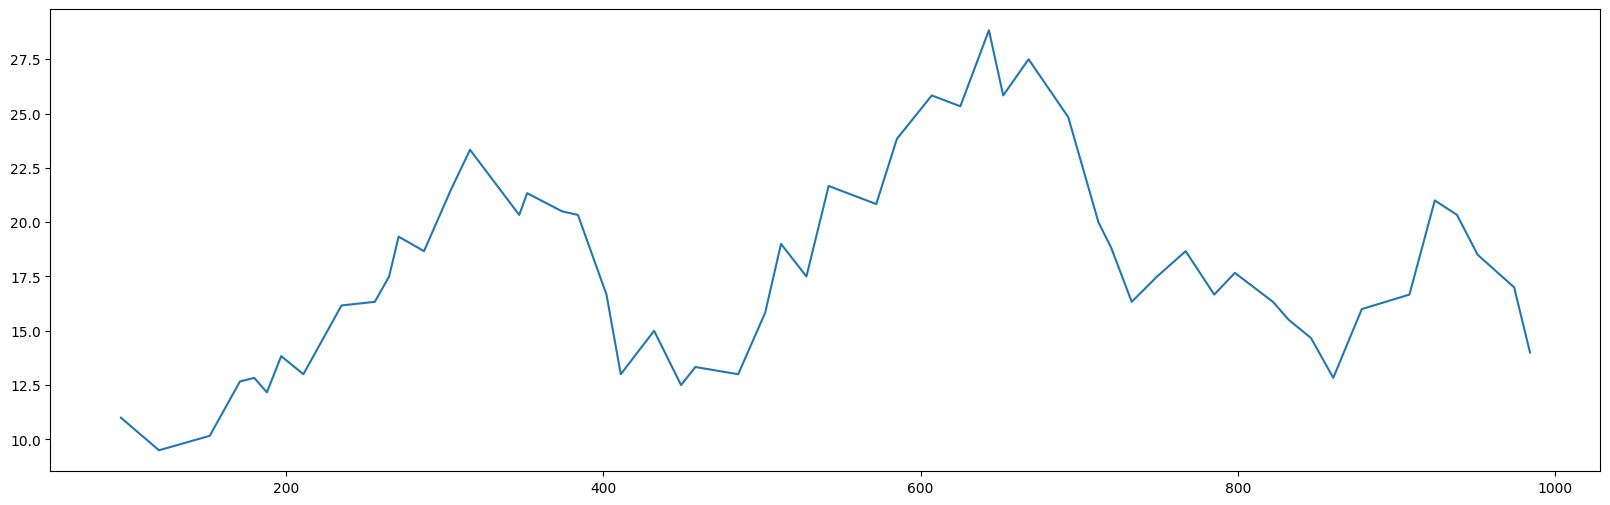

In [29]:
# halves_df.set_index('Match Date', inplace=True)

plt.figure(figsize=(20,6))
halves_df.loc[(halves_df['Team']=='ZEBRE')]['Team Score'].rolling(window=6).mean().plot()
plt.show()

In [30]:
bins = [-float("inf"), -22, -15, -8, -1,0, 7, 14, 21, float("inf")]
labels = ["4+ tries down" , "3 tries down", "2 tries down", "1 try down", "draw", "1 try up", "2 tries up", "3 tries up", "4+ tries up"]


halves_df["1st half margin binned"] = pd.cut(halves_df['1st Half Margin'], bins=bins, labels=labels).astype(str)

halves_df.tail(4)

,Primary Key,Match Date,Team,Opponents,Season,Team Location,Team Score,Opponent Score,1st_half_team_score,2nd_half_team_score,1st_half_opponent_score,2nd_half_opponent_score,Full Result,1st Half Result,2nd Half Result,Full Margin,1st Half Margin,2nd Half Margin,1st half margin binned
994,SHARKS_MUNSTER_2024-10-26,2024-10-26,MUNSTER,SHARKS,24/25 (6 rounds),Away Team,24,41,10,14,31,10,L,L,W,-17,-21,4,3 tries down
995,LEINSTER_LIONS_2024-10-26,2024-10-26,LIONS,LEINSTER,24/25 (6 rounds),Away Team,6,24,6,0,10,14,L,L,L,-18,-4,-14,1 try down
996,CONNACHT_DRAGONS_2024-10-26,2024-10-26,DRAGONS,CONNACHT,24/25 (6 rounds),Away Team,7,31,0,7,19,12,L,L,L,-24,-19,-5,3 tries down
997,CARDIFF_ULSTER_2024-10-26,2024-10-26,ULSTER,CARDIFF,24/25 (6 rounds),Away Team,19,21,19,0,0,21,L,W,L,-2,19,-21,3 tries up


In [31]:
df_1st_half_loser = halves_df.loc[halves_df['1st Half Result'] == 'L'].copy()
df_1st_half_loser.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Team Location,Team Score,Opponent Score,1st_half_team_score,2nd_half_team_score,1st_half_opponent_score,2nd_half_opponent_score,Full Result,1st Half Result,2nd Half Result,Full Margin,1st Half Margin,2nd Half Margin,1st half margin binned
965,DRAGONS_LIONS_2024-10-13,2024-10-13,LIONS,DRAGONS,24/25 (6 rounds),Away Team,23,19,10,13,12,7,W,L,W,4,-2,6,1 try down
966,SCARLETS_BULLS_2024-10-18,2024-10-18,SCARLETS,BULLS,24/25 (6 rounds),Home Team,23,22,10,13,19,3,W,L,W,1,-9,10,2 tries down
969,ULSTER_OSPREYS_2024-10-18,2024-10-18,OSPREYS,ULSTER,24/25 (6 rounds),Away Team,12,36,7,5,24,12,L,L,L,-24,-17,-7,3 tries down
970,DRAGONS_BENETTON_2024-10-19,2024-10-19,DRAGONS,BENETTON,24/25 (6 rounds),Home Team,21,31,7,14,10,21,L,L,L,-10,-3,-7,1 try down
972,CONNACHT_LEINSTER_2024-10-19,2024-10-19,CONNACHT,LEINSTER,24/25 (6 rounds),Home Team,12,33,5,7,21,12,L,L,L,-21,-16,-5,3 tries down
973,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,EDINBURGH,CARDIFF,24/25 (6 rounds),Home Team,27,8,3,24,5,3,W,L,W,19,-2,21,1 try down
974,ZEBRE_LIONS_2024-10-19,2024-10-19,ZEBRE,LIONS,24/25 (6 rounds),Home Team,9,10,6,3,7,3,L,L,D,-1,-1,0,1 try down
977,SHARKS_GLASGOW_2024-10-19,2024-10-19,GLASGOW,SHARKS,24/25 (6 rounds),Away Team,24,28,12,12,15,13,L,L,L,-4,-3,-1,1 try down
981,STORMERS_MUNSTER_2024-10-19,2024-10-19,MUNSTER,STORMERS,24/25 (6 rounds),Away Team,19,34,12,7,14,17,L,L,L,-15,-2,-10,1 try down
984,SCARLETS_ZEBRE_2024-10-25,2024-10-25,ZEBRE,SCARLETS,24/25 (6 rounds),Away Team,8,30,5,0,11,19,L,L,L,-22,-6,-19,1 try down


In [32]:
df_1st_half_loser['1st half margin binned'].value_counts().index

Index(['1 try down', '2 tries down', '3 tries down', '4+ tries down'], dtype='object', name='1st half margin binned')

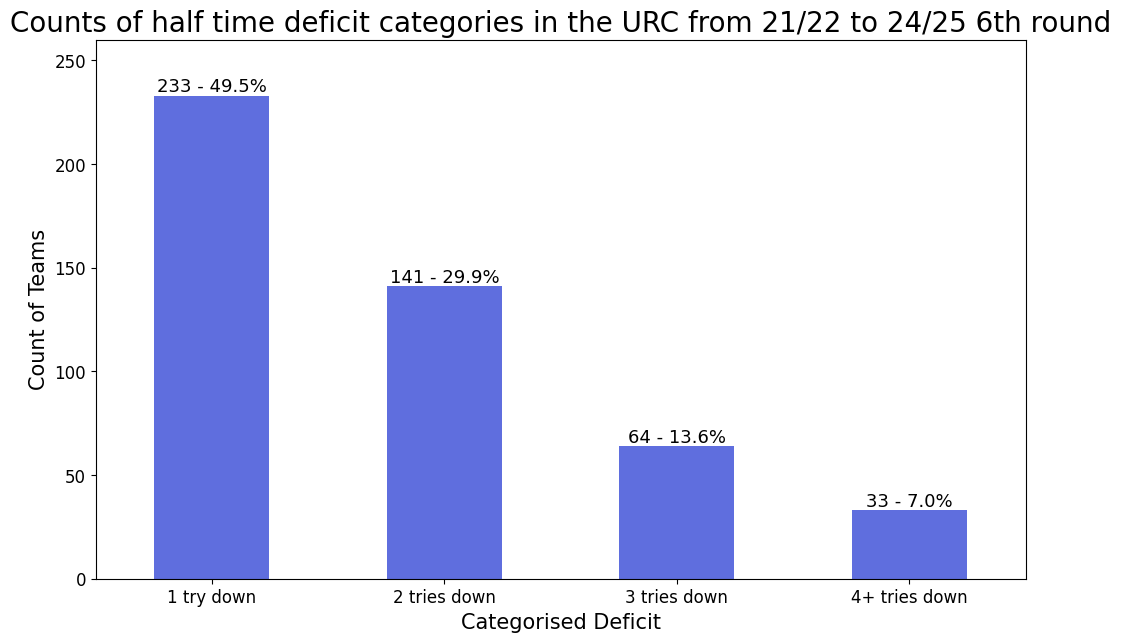

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.countplot(x="1st half margin binned",
            data=df_1st_half_loser, 
            order=['1 try down', '2 tries down', '3 tries down', '4+ tries down'],
            fill=True,
            gap=0.01,
           width=0.5,
           color='#4A5EF3')

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f"{int(value)} - {round(100*int(value)/halves_df['1st Half Result'].value_counts()['L'], 1)}%" for value in bars_0.datavalues], fontsize=13)

plt.ylim(0, 260)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Counts of half time deficit categories in the URC from 21/22 to 24/25 6th round",fontsize=20)
ax.set_xlabel("Categorised Deficit",fontsize=15)
ax.set_ylabel("Count of Teams",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

plt.show()

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_31473/160310927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Team",


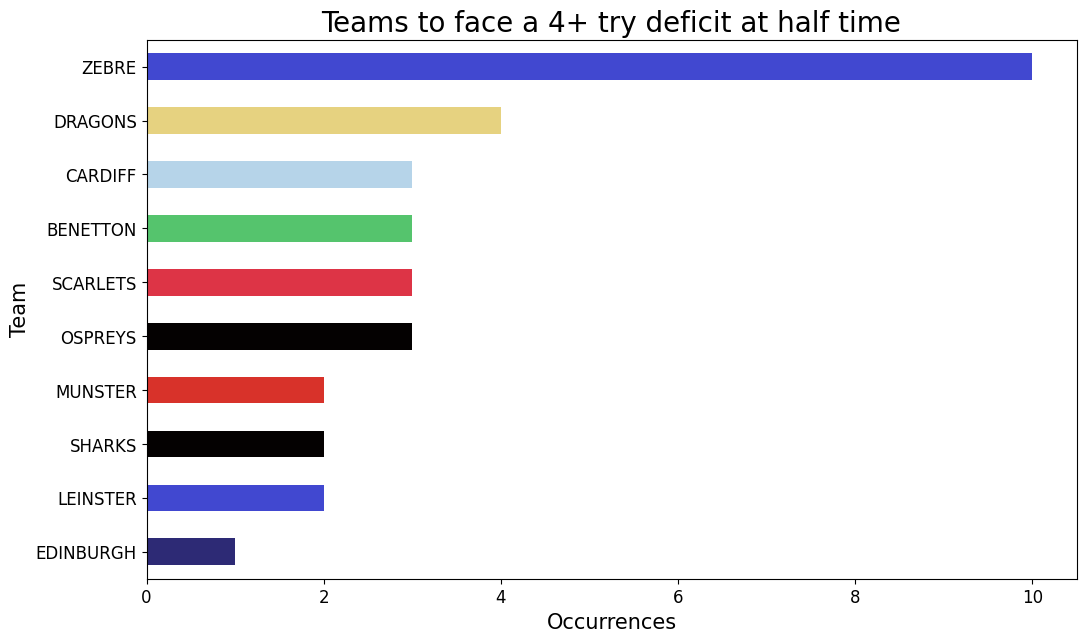

In [34]:
pkeys_for_plot = df_1st_half_loser.loc[df_1st_half_loser['1st half margin binned']=='4+ tries down']['Primary Key']
data_for_plot = df_1st_half_loser.loc[df_1st_half_loser['Primary Key'].isin(pkeys_for_plot)].copy()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.countplot(y="Team",
            data=data_for_plot,
            order = data_for_plot['Team'].value_counts().index,
            fill=True,
            gap=0.01,
           width=0.5,
           palette=['#2932E8', '#F7DC6F', '#AED6F1', '#43D662', '#F91830', '#050100', '#F5180D', '#050100', '#2932E8', '#221E81'],
             orient='y')

bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f"{int(value)}" for value in bars_0.datavalues], fontsize=13)

# plt.ylim(0, 260)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Teams to face a 4+ try deficit at half time",fontsize=20)
ax.set_xlabel("Occurrences",fontsize=15)
ax.set_ylabel("Team",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

plt.show()

del(data_for_plot)

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_31473/329789013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Opponents",


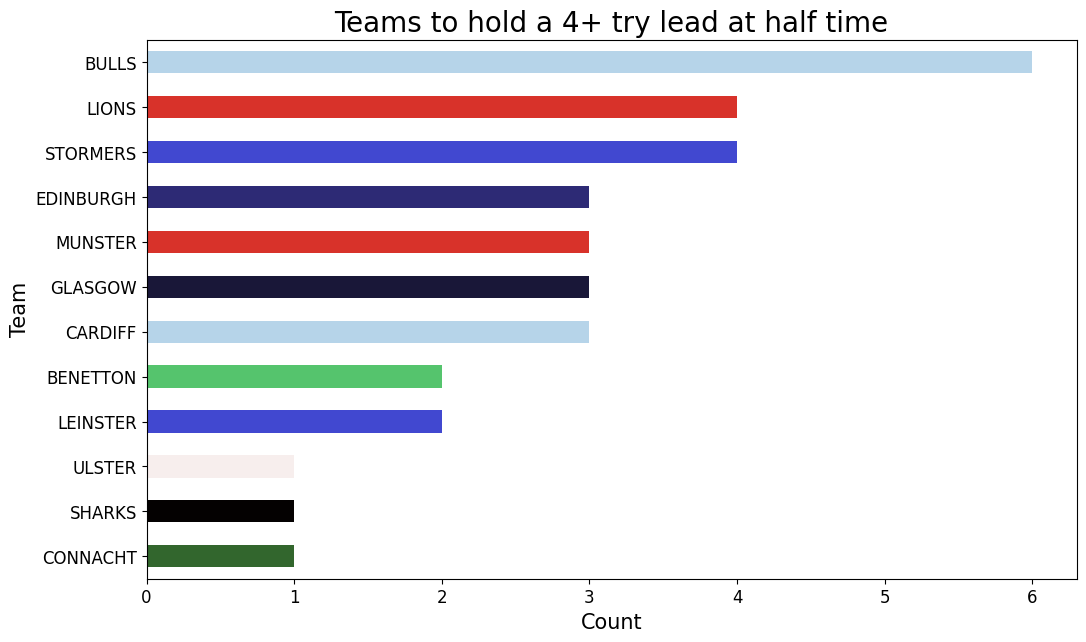

In [35]:

pkeys_for_plot = df_1st_half_loser.loc[df_1st_half_loser['1st half margin binned']=='4+ tries down']['Primary Key']
data_for_plot = df_1st_half_loser.loc[df_1st_half_loser['Primary Key'].isin(pkeys_for_plot)].copy()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.countplot(y="Opponents",
            data=data_for_plot,
            order = data_for_plot['Opponents'].value_counts().index,
            fill=True,
            gap=0.01,
           width=0.5,
           palette=['#AED6F1', '#F5180D',  '#2932E8', '#221E81', '#F5180D',  '#14123D', '#AED6F1', '#43D662', '#2932E8', '#F9ECEB', '#050100', '#2A6F24'],
             orient='y')

bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f"{int(value)}" for value in bars_0.datavalues], fontsize=13)

# plt.ylim(0, 260)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Teams to hold a 4+ try lead at half time",fontsize=20)
ax.set_xlabel("Count",fontsize=15)
ax.set_ylabel("Team",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

plt.show()

del(data_for_plot)

# The Comeback Kids

In [36]:
df_1st_half_loser.loc[(df_1st_half_loser['1st Half Result']=='L') & (df_1st_half_loser['Full Result']=='W')].sort_values(by='1st Half Margin', ascending=True).head(10)

,Primary Key,Match Date,Team,Opponents,Season,Team Location,Team Score,Opponent Score,1st_half_team_score,2nd_half_team_score,1st_half_opponent_score,2nd_half_opponent_score,Full Result,1st Half Result,2nd Half Result,Full Margin,1st Half Margin,2nd Half Margin,1st half margin binned
926,CONNACHT_SHARKS_2024-09-28,2024-09-28,CONNACHT,SHARKS,24/25 (6 rounds),Home Team,36,30,7,29,27,3,W,L,W,6,-20,26,3 tries down
991,CARDIFF_ULSTER_2024-10-26,2024-10-26,CARDIFF,ULSTER,24/25 (6 rounds),Home Team,21,19,0,21,19,0,W,L,W,2,-19,21,3 tries down
430,LEINSTER_ULSTER_2022-12-03,2022-12-03,LEINSTER,ULSTER,22/23,Home Team,38,29,8,30,22,7,W,L,W,9,-14,23,2 tries down
781,GLASGOW_CARDIFF_2024-03-22,2024-03-22,GLASGOW,CARDIFF,23/24,Home Team,17,13,0,17,13,0,W,L,W,4,-13,17,2 tries down
41,CARDIFF_BULLS_2021-10-09,2021-10-09,BULLS,CARDIFF,21/22,Away Team,29,19,3,26,16,3,W,L,W,10,-13,23,2 tries down
736,OSPREYS_CARDIFF_2024-01-01,2024-01-01,OSPREYS,CARDIFF,23/24,Home Team,27,21,5,22,18,3,W,L,W,6,-13,19,2 tries down
401,LIONS_STORMERS_2022-10-29,2022-10-29,STORMERS,LIONS,22/23,Away Team,31,22,10,21,22,0,W,L,W,9,-12,21,2 tries down
745,SHARKS_LIONS_2024-01-06,2024-01-06,LIONS,SHARKS,23/24,Away Team,20,18,3,17,15,0,W,L,W,2,-12,17,2 tries down
573,LIONS_LEINSTER_2023-04-15,2023-04-15,LEINSTER,LIONS,22/23,Away Team,39,36,14,25,26,10,W,L,W,3,-12,15,2 tries down
924,ZEBRE_MUNSTER_2024-09-28,2024-09-28,ZEBRE,MUNSTER,24/25 (6 rounds),Home Team,42,33,15,27,26,7,W,L,W,9,-11,20,2 tries down


In [37]:
df_1st_half_loser.loc[(df_1st_half_loser['1st Half Result']=='L')].groupby(['1st half margin binned', 'Full Result'])['Primary Key'].count().reset_index()

,1st half margin binned,Full Result,Primary Key
0,1 try down,D,4
1,1 try down,L,146
2,1 try down,W,83
3,2 tries down,D,4
4,2 tries down,L,108
5,2 tries down,W,29
6,3 tries down,D,1
7,3 tries down,L,61
8,3 tries down,W,2
9,4+ tries down,L,33


In [38]:
full_time_results_df = df_1st_half_loser.loc[(df_1st_half_loser['1st Half Result']=='L')].groupby(['Team', 'Full Result'])['Primary Key'].count().reset_index()
full_time_results_df

,Team,Full Result,Primary Key
0,BENETTON,L,22
1,BENETTON,W,7
2,BULLS,L,15
3,BULLS,W,5
4,CARDIFF,D,1
5,CARDIFF,L,21
6,CARDIFF,W,4
7,CONNACHT,L,23
8,CONNACHT,W,8
9,DRAGONS,D,1


In [39]:
full_time_results_df = df_1st_half_loser.loc[(df_1st_half_loser['1st Half Result']=='L')].groupby(['Team', 'Full Result'])['Primary Key'].count().reset_index()
full_time_results_df.rename(columns={"Primary Key": "Amount"}, inplace=True)

losing_half_time_teams_df = full_time_results_df.groupby('Team')['Amount'].sum().reset_index()
losing_half_time_teams_df.rename(columns={"Amount": "Total"}, inplace=True)

team_comeback_pct_df = pd.merge(full_time_results_df, losing_half_time_teams_df)
team_comeback_pct_df['PCT'] = (team_comeback_pct_df['Amount'] / team_comeback_pct_df['Total'])*100

team_comeback_pct_df.sort_values(by=['Full Result', 'PCT'], ascending=[False, False])

,Team,Full Result,Amount,Total,PCT
34,STORMERS,W,12,23,52.173913
18,LEINSTER,W,9,19,47.368421
36,ULSTER,W,8,19,42.105263
23,MUNSTER,W,9,25,36.000000
15,GLASGOW,W,8,23,34.782609
20,LIONS,W,9,32,28.125000
26,OSPREYS,W,10,36,27.777778
13,EDINBURGH,W,7,26,26.923077
8,CONNACHT,W,8,31,25.806452
3,BULLS,W,5,20,25.000000


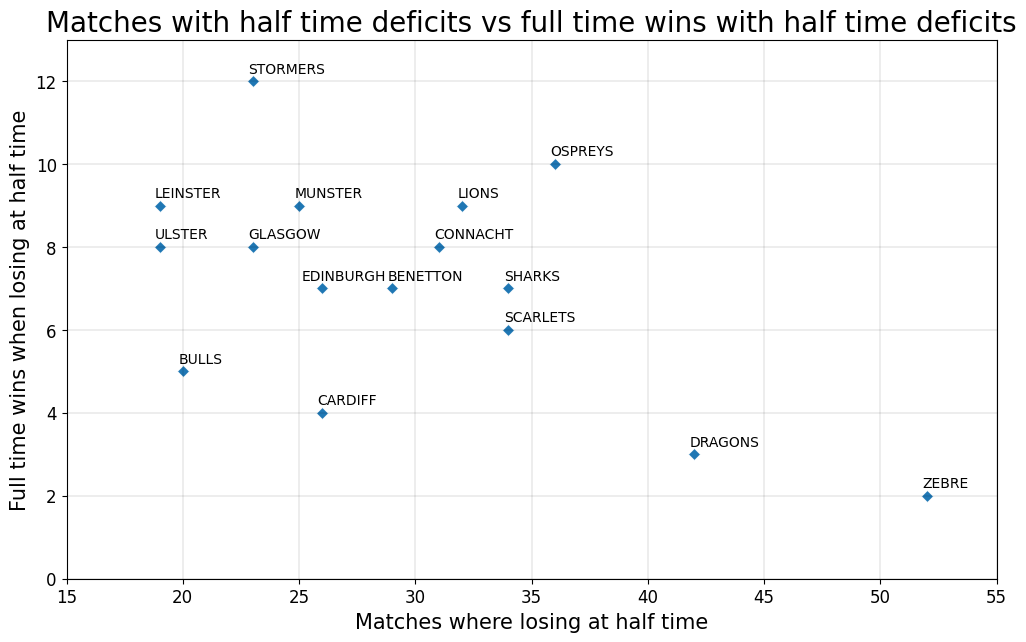

In [40]:

data_for_plot = team_comeback_pct_df.loc[team_comeback_pct_df['Full Result']=='W'].copy()

fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.scatterplot(x="Total",
                y="Amount",
            data=data_for_plot,
               marker='D')
                
           # palette=['#AED6F1', '#F5180D',  '#2932E8', '#221E81', '#F5180D',  '#14123D', '#AED6F1', '#43D662', '#2932E8', '#F9ECEB', '#050100', '#2A6F24'])

plt.ylim(0, 13)  # Set the y-axis limits from 0 to 8
plt.xlim(15, 55)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Matches with half time deficits vs full time wins with half time deficits",fontsize=20)
ax.set_xlabel("Matches where losing at half time",fontsize=15)
ax.set_ylabel("Full time wins when losing at half time",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if str(point['val'])=='EDINBURGH':
            ax.text(point['x']-.9, point['y']+.2, str(point['val']))
        else:
            ax.text(point['x']-.2, point['y']+.2, str(point['val']))

label_point(data_for_plot.Total, data_for_plot.Amount, data_for_plot.Team, plt.gca()) 

plt.grid(True, color='black', linewidth=.1)
plt.show()

del(data_for_plot)

In [41]:
df_1st_half_loser.Team.value_counts().values

array([52, 42, 36, 34, 34, 32, 31, 29, 26, 26, 25, 23, 23, 20, 19, 19])

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_31473/3275271532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Team",


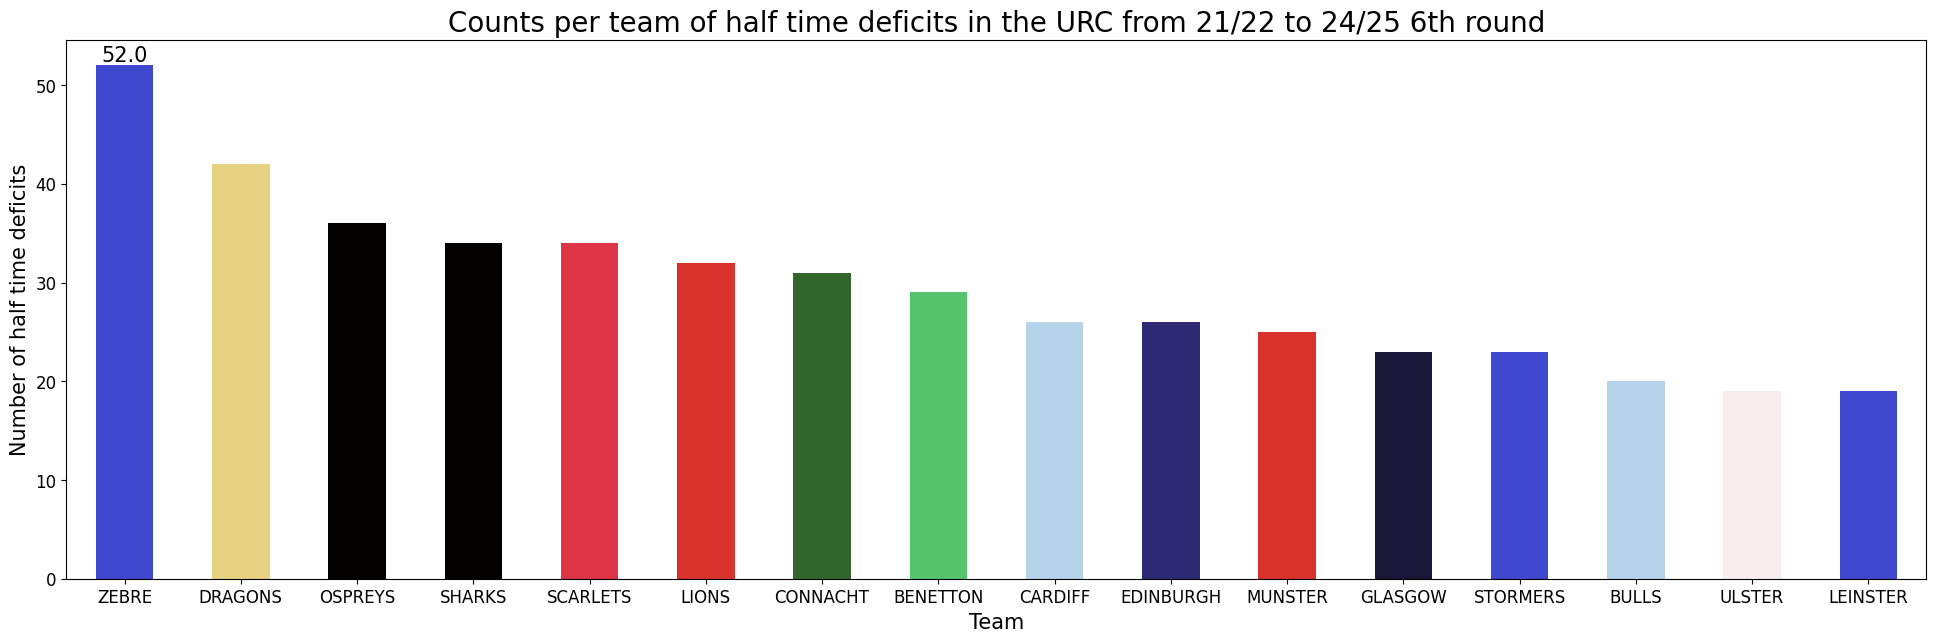

In [45]:

fig, ax = plt.subplots(1,1, figsize=(24, 7))

team_order = df_1st_half_loser.Team.value_counts().index.tolist()
team_colour_list = [team_colours[i] for i in team_order]

sns.countplot(x="Team",
            data=df_1st_half_loser,
            order=team_order,
            fill=True,
            gap=0.01,
            width=0.5,
            palette=team_colour_list)

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 260)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Counts per team of half time deficits in the URC from 21/22 to 24/25 6th round", fontsize=20)
ax.set_xlabel("Team",fontsize=15)
ax.set_ylabel("Number of half time deficits",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

plt.show()

In [ ]:
team_comeback_pct_df

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_31473/2149560730.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Team", y="Total",


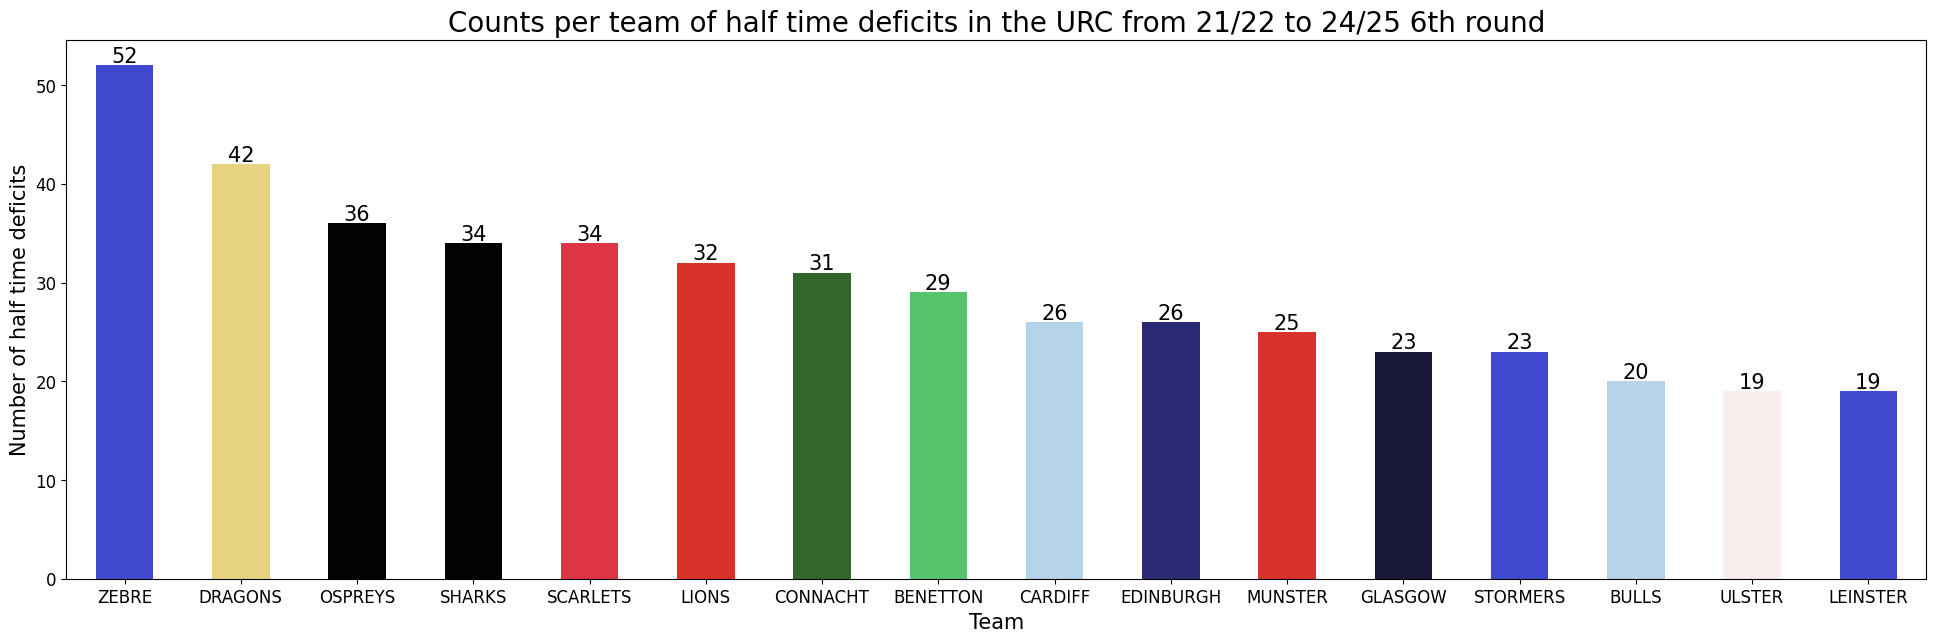

In [50]:

fig, ax = plt.subplots(1,1, figsize=(24, 7))

team_order = df_1st_half_loser.Team.value_counts().index.tolist()
team_colour_list = [team_colours[i] for i in team_order]
data_for_plot = team_comeback_pct_df.loc[team_comeback_pct_df['Full Result']=='L']

sns.barplot(x="Team", y="Total",
            data=data_for_plot,
            order=team_order,
            fill=True,
            gap=0.01,
            width=0.5,
            palette=team_colour_list)

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

for i, v in enumerate(df_1st_half_loser.Team.value_counts().values):
   ax.text(i, v + 0.3, str(v), ha='center', fontsize=15)


# plt.ylim(0, 260)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Counts per team of half time deficits in the URC from 21/22 to 24/25 6th round", fontsize=20)
ax.set_xlabel("Team",fontsize=15)
ax.set_ylabel("Number of half time deficits",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)

plt.show()